'''
https://www.kaggle.com/code/zzettrkalpakbal/genetic-algorithm-tutorial-of-pygad
https://www.analyticsvidhya.com/blog/2021/05/classification-algorithms-in-python-heart-attack-prediction-and-analysis/
''';

In [37]:
!pip3 install mplcyberpunk


In [38]:
import pygad
import pygad.nn
import pygad.gann

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

from keras import callbacks
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
import tensorflow as tf

import mplcyberpunk


In [39]:
df = pd.read_csv("./heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
y = df.output
X = df.drop(columns="output")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = .2,
                                                    random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((242, 13), (242,), (61, 13), (61,))

In [41]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)



Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/32
16/16 [==============================] - 1s 6ms/step - loss: 1.7531 - accuracy: 0.4545 - val_loss: 0.8938 - val_accuracy: 0.4590 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/32
16/16 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.6446 - val_loss: 0.4735 - val_accuracy: 0.8361 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/32
16/16 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8554 - val_loss: 0.4340 - val_accuracy: 0.8361 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/32
16/16 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8388 - val_loss: 0.6595 - val_accuracy: 0.8033 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.0099999997764

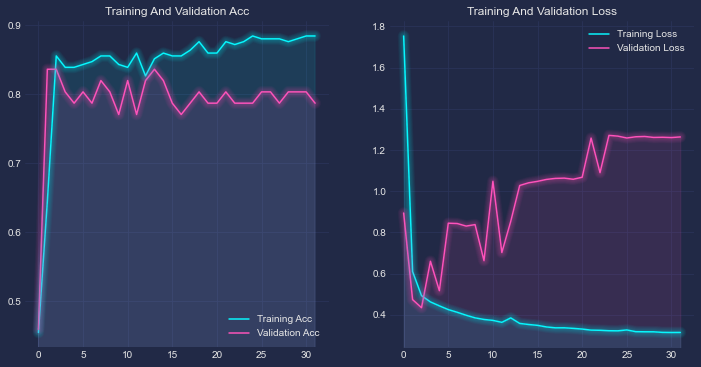

CPU times: user 2.58 s, sys: 789 ms, total: 3.37 s
Wall time: 2.44 s


In [42]:
%%time
classifier = tf.keras.Sequential()
tf.compat.v1.reset_default_graph()
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform' , activation = 'relu', input_dim = X_train.shape[1]))
# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

# Fitting the ANN to the Training set

r = classifier.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   callbacks=[callbacks.EarlyStopping(min_delta=0.0001,patience=40,restore_best_weights=True),
                             tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)],
                   batch_size=16,
                   epochs=32)

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()
mplcyberpunk.add_glow_effects()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()


In [43]:
y_pred_tr = [1 if each >= 0.5 else 0 for each in classifier.predict(X_train)]
y_pred_ts = [1 if each >= 0.5 else 0 for each in classifier.predict(X_test)]
#
print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.3f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))


2/2 [==============================] - 0s 995us/step
Train Accuracy score: 0.88
Train ROC AUC score: 0.88
Test Accuracy score: 0.79
Test ROC-AUC score: 0.784
[[21  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [44]:
#PyGAD


In [45]:
# Inputs

array_X = X_train #.values (Scaler function return np array and pygad working with np.array)
array_y = y_train.values
array_X.shape,array_y.shape


((242, 13), (242,))

In [46]:
# def fitness_func(solution, sol_idx):
def fitness_func(ga_instance, solution, sol_idx):

    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    # print(f'dbd solution_fitness: {solution_fitness}')
    return solution_fitness


In [47]:
# First generation must came from zero.
last_fitness = 0

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy();

# Holds the fitness value of the previous generation. We use this on the callback function


In [48]:
# Prepare to data

#Before building and training neural networks, the training data (input and output) is to be prepared.
# The inputs and the outputs of the training data are NumPy arrays.
# Reading the input data.
data_inputs = array_X
# Optional step of filtering the input data using the standard deviation.
#features_STDs = numpy.std(a=data_inputs, axis=0)
#data_inputs = data_inputs[:, features_STDs>50]

# Reading the output data.
data_outputs = array_y

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# The number of neurons in the output layer (i.e. number of classes).
# For the XOR models, there are 2 classes and thus their labels are 0 and 1.
# The num_classes variable is assigned to 2.
num_classes = 2


In [49]:
# The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.

num_solutions = 16
# A solution or a network can be used interchangeably.
# Number of solutions like as chromosomes.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                # chromosomes
                                num_neurons_input=num_inputs,
                                # input layer
                                #num_neurons_output=1,
                                # Number of neurons in the output layer.
                                num_neurons_hidden_layers=[8,16,32],
                                # I have comparing with above ANN, you can changing array.
                                # While each number in the array represents the hidden layers from left to right,
                                # the values they take represent the number of nodes.
                                # If empty [], then no hidden layers are used.
                                # For each int value it holds, then a hidden layer is created with a number of hidden neurons specified by the corresponding int value.
                                # For example, num_neurons_hidden_layers=[10] creates a single hidden layer with 10 neurons.
                                # num_neurons_hidden_layers=[10, 5] creates 2 hidden layers with 10 neurons for the first and 5 neurons for the second hidden layer.
                                num_neurons_output=num_classes,
                                # output layer
                                hidden_activations=["relu", "relu","relu"],
                                # Each array element is the activation function of
                                # the hidden layer at the same index.
                                # relu, sigmoid and softmax avaible.
                                output_activation="sigmoid"
                                #  here is important because of if num_classes bigger than 2
                                # output_activation must be "softmax"
                               )

# population does not hold the numerical weights of the network
# instead it holds a list of references to each last layer of each network (i.e. solution) in the population.
# A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements.
# Each element is a reference to the last layer of each network.
# Using such a reference, all details of the network can be accessed.

# let's create first population
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter.
# This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters.
# If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
# Don't forget your root!
initial_population = population_vectors.copy()


In [50]:
# Number of solutions to be selected as parents in the mating pool.

num_parents_mating = 4

# Number of generations

num_generations = 1000 # Number of generations


In [51]:
parent_selection_type = "tournament" # Type of parent selection.
keep_parents = -1
# Number of parents to keep in the next population.
# -1 means keep all parents and 0 means keep nothing.

####-sss (for steady state selection)
####-rws (for roulette wheel selection)
####-sus (for stochastic universal selection)
####-rank (for rank selection)
####-random (for random selection)
####-tournament (for tournament selection),
K_tournament=4 # Just tournament


In [52]:
crossover_type = "uniform" # Type of the crossover operator.

####-single_point (for single point crossover)
####-two_points (for two points crossover)
####-uniform (for uniform crossover)
####-scattered (for scattered crossover)

crossover_probability= 1 #arange(0,1)


In [53]:
mutation_percent_genes = 10
# Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
# If you want use to adaptive, you can setting parameter on the ga_instance parameter.
# I cant running with my dataset but I added example code for adaptive mutation below.
mutation_type = "random" # Type of the mutation operator.


####-random (for random mutation)
####-swap (for swap mutation)
####-inversion (for inversion mutation)
####-scramble (for scramble mutation)
####-adaptive (for adaptive mutation)
                    # If you selecting to adaptive paramter you must already usi this below parameters.
                    #mutation_probability=mutation_probability,
                    #mutation_num_genes=mutation_num_genes


/Users/dbd/miniconda/envs/tf_kaggle/lib/python3.10/site-packages/pygad/nn/nn.py:156: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + numpy.exp(-1 * sop))


Generation = 100
Fitness    = 88.01652892561982
Change     = 0.0
Generation = 200
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 300
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 400
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 500
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 600
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 700
Fitness    = 90.9090909090909
Change     = 0.0
Generation = 800
Fitness    = 91.73553719008265
Change     = 0.0
Generation = 900
Fitness    = 91.73553719008265
Change     = 0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation = 1000
Fitness    = 91.73553719008265
Change     = 0.0


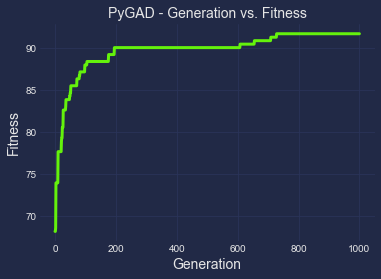

Fitness value of the best solution = 91.73553719008265
Index of the best solution : 0
Best fitness value reached after 728 generations.


In [54]:
verbose = 100
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       # mutation_percent_genes=mutation_percent_genes,
                       # When the set adaptive mutation
                       #mutation_percent_genes= (25,12),
                       #mutation_probability=(0.35,0.12),
                       #mutation_num_genes=(4,2),
                       #sol_per_pop=20,
                       #num_genes=len(array_X),
                       # When the set tournament selection
                       K_tournament=K_tournament,
                       parent_selection_type=parent_selection_type,
                       crossover_probability=crossover_probability,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)


# By calling the run() method from the pygad.GA instance,
# the genetic algorithm will iterate through the number of generations specified in its num_generations parameter.
ga_instance.run()

#Plot the Fitness Values
#After the run() method completes, the plot_fitness() method can be called to show how the fitness values evolve by generation.
# A fitness value (i.e. accuracy) of 100 is reached after around 180 generations.
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
#print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)
#print("Predictions of the trained network : {predictions}".format(predictions=predictions))


In [55]:
# Calculating some statistics
num_wrong = np.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))


Number of correct classifications : 222.
Number of wrong classifications : 20.
Classification accuracy : 91.73553719008265.


In [56]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)

print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.4f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))


Train Accuracy score: 0.9174
Train ROC AUC score: 0.9152
Test Accuracy score: 0.7541
Test ROC-AUC score: 0.7511
[[20  8]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

